DATA SOURCE:
https://www.kaggle.com/c/bike-sharing-demand/data

# DATA PREPROCESSING:

In [1]:
from pylab import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn 
from sklearn import model_selection
import statsmodels.api as sm
from datetime import datetime
import warnings; warnings.simplefilter('ignore')

#pylab is a "magic function" that you can call within IPython, or Interactive Python. 
#By invoking it, the IPython interpreter will import matplotlib and NumPy modules such that you'll have convenient 
#access to their functions.

data = pd.read_csv('hour.csv')
print(data.shape)
print(data.head())
data.dtypes

(17379, 17)
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [2]:
data.rename(columns={'weathersit':'weather', 'mnth':'month', 'hr':'hour', 'hum':'humidity', 'cnt':'count'}, inplace=True)
data = data.drop(['instant','dteday','yr'], axis=1)
data.head()


,season,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
data['season'] = data.season.astype('category')
data['month'] = data.month.astype('category')
data['hour'] = data.hour.astype('category')
data['holiday'] = data.holiday.astype('category')
data['weekday'] = data.weekday.astype('category')
data['workingday'] = data.workingday.astype('category')
data['weather'] = data.weather.astype('category')
data.dtypes


season        category
month         category
hour          category
holiday       category
weekday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity       float64
windspeed      float64
casual           int64
registered       int64
count            int64
dtype: object

In [4]:
data.isnull().any()
#data.isnull().sum()

season        False
month         False
hour          False
holiday       False
weekday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
casual        False
registered    False
count         False
dtype: bool

# VISUALIZATION:

Here’s the part we all love and hate: visualisation. We’ll work on a couple of graphs to try to see how data behaves. The first of them is an analysis of how users use the system on each day of the week.

We can see that usage is different on work days and on weekends. On Sundays and Saturdays, people use more the bikes during afternoon, while during work days, bikes are mostly used to go and come from work/school.



[Text(0.5, 1.0, 'Use of the system during weekdays and weekends')]

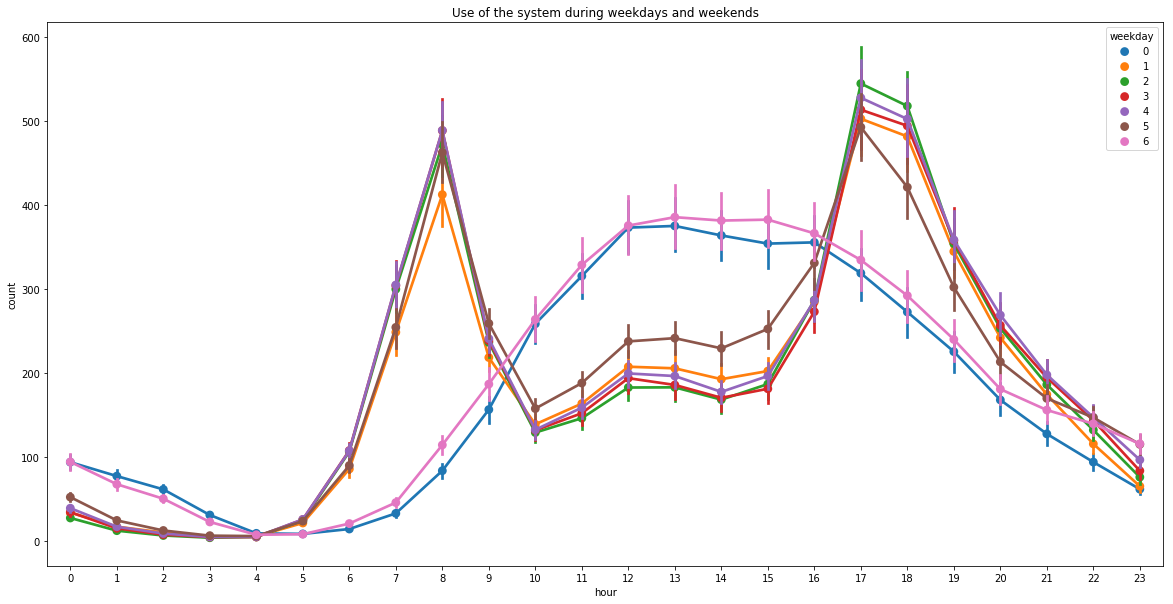

In [5]:
fig, ax = plt.subplots(figsize=(20,10))
sn.pointplot(data=data[['hour',
                       'count',
                       'weekday']],
            x='hour', y='count',
            hue='weekday', ax=ax)
ax.set(title="Use of the system during weekdays and weekends")
#print(fig)

Let’s now understand how casual and registered users use the vehicles. In fact, we see that casual users tend to use the bikes during afternoon during the all week, while registered users follow the first graph pattern (leisure on weekends and to go to work on weekdays).

[Text(0.5, 1.0, 'Use of the system by casual users')]

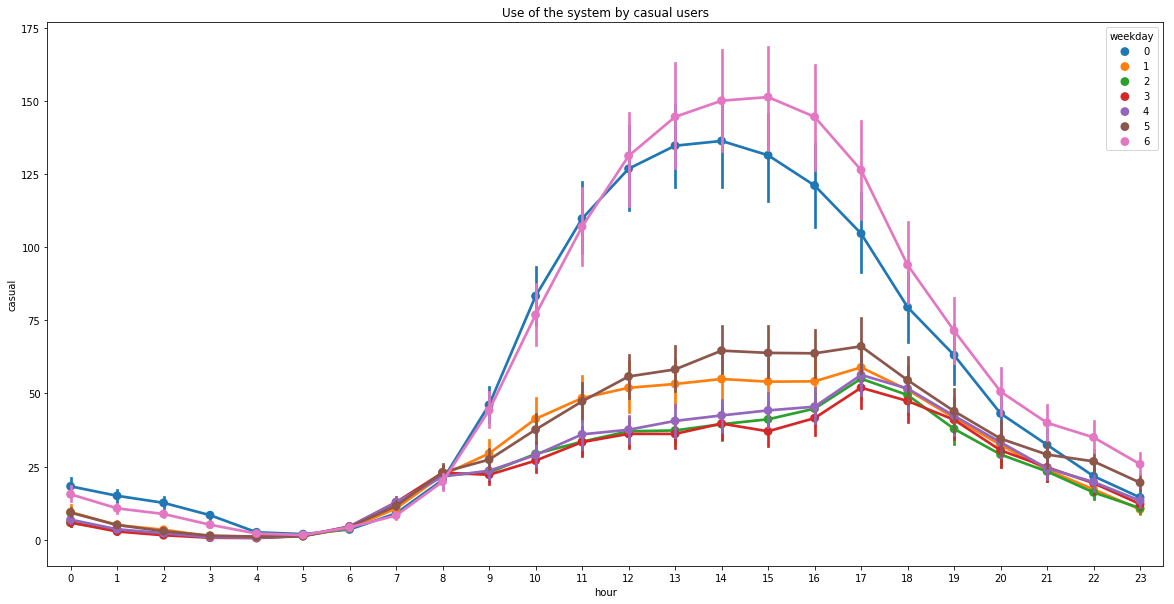

In [6]:
fig, ax = plt.subplots(figsize=(20,10))
sn.pointplot(data=data[['hour',
                       'casual',
                       'weekday']],
            x='hour', y='casual',
            hue='weekday', ax=ax)
ax.set(title="Use of the system by casual users")

[Text(0.5, 1.0, 'Use of the system by registered users')]

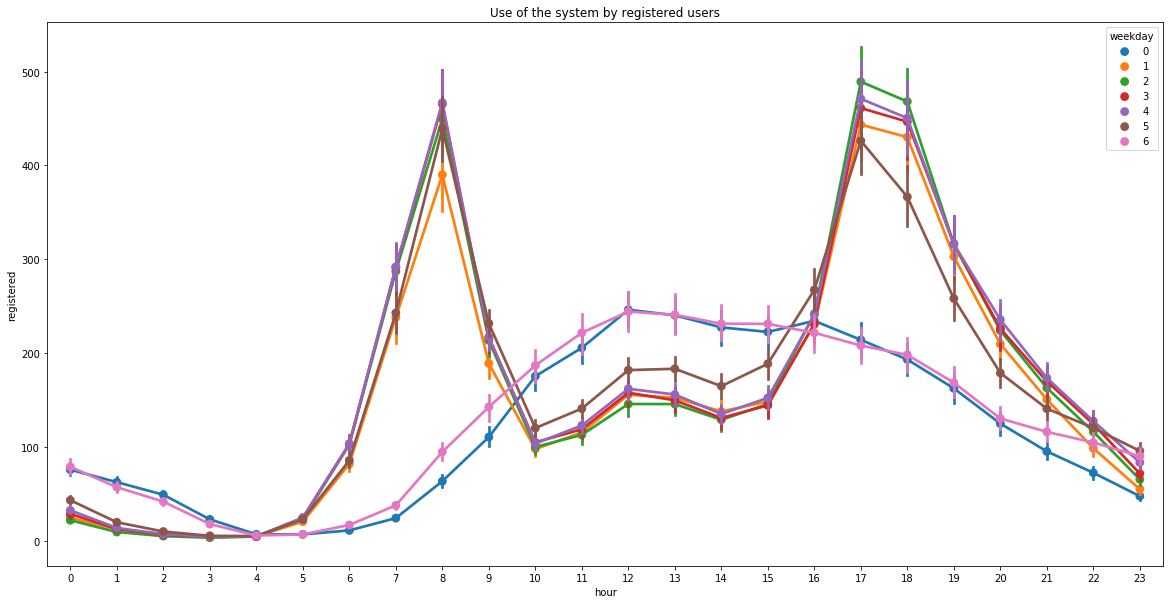

In [7]:
fig, ax = plt.subplots(figsize=(20,10))
sn.pointplot(data=data[['hour',
                       'registered',
                       'weekday']],
            x='hour', y='registered',
            hue='weekday', ax=ax)
ax.set(title="Use of the system by registered users")

Can we also see a difference of usage when weather condition changes? And when season changes? Well, we see that people use more the system when it’s sunny and during Autumn. They tend to use less the bikes during spring time.

WEATHER, 
1: Clear, Few clouds, Partly cloudy, Partly cloudy, 
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist, 
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds, 
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


[Text(0.5, 1.0, 'Use of the system: weather condition')]

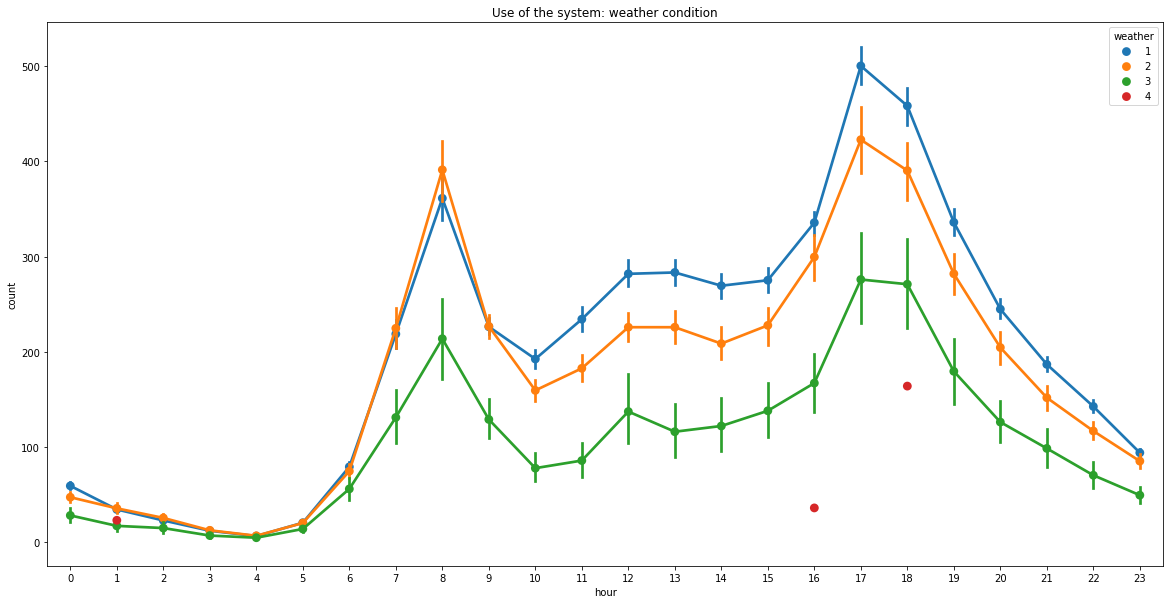

In [8]:
print('WEATHER, \n1: Clear, Few clouds, Partly cloudy, Partly cloudy, \n2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist, \n3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds, \n4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog')

fig, ax = plt.subplots(figsize=(20,10))
sn.pointplot(data=data[['hour',
                       'count',
                       'weather']],
            x='hour', y='count',
            hue='weather', ax=ax)
ax.set(title="Use of the system: weather condition")

SEASON, 
1: spring, 
2: summer, 
3: fall, 
4: winter


[Text(0.5, 1.0, 'Use of the system: season')]

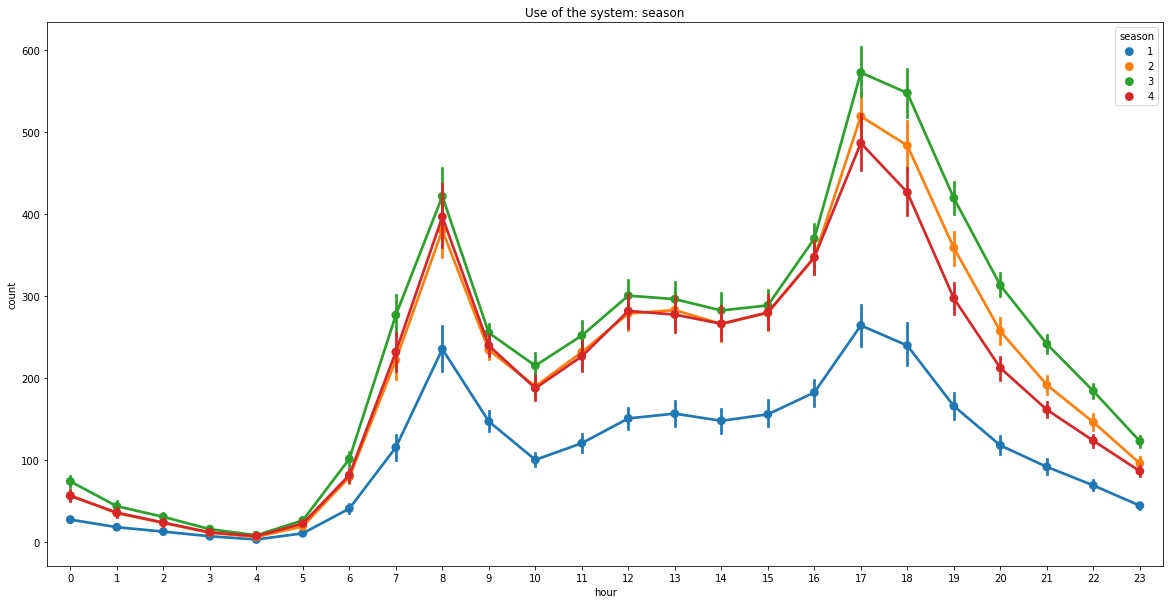

In [9]:
print('SEASON, \n1: spring, \n2: summer, \n3: fall, \n4: winter')

fig, ax = plt.subplots(figsize=(20,10))
sn.pointplot(data=data[['hour',
                       'count',
                       'season']],
            x='hour', y='count',
            hue='season', ax=ax)
ax.set(title="Use of the system: season")

If we check the monthly distribution, we can better see this. However, if we check the daily distribution, we don’t see much difference in usage of the system.

[Text(0.5, 1.0, 'Monthly distribution')]

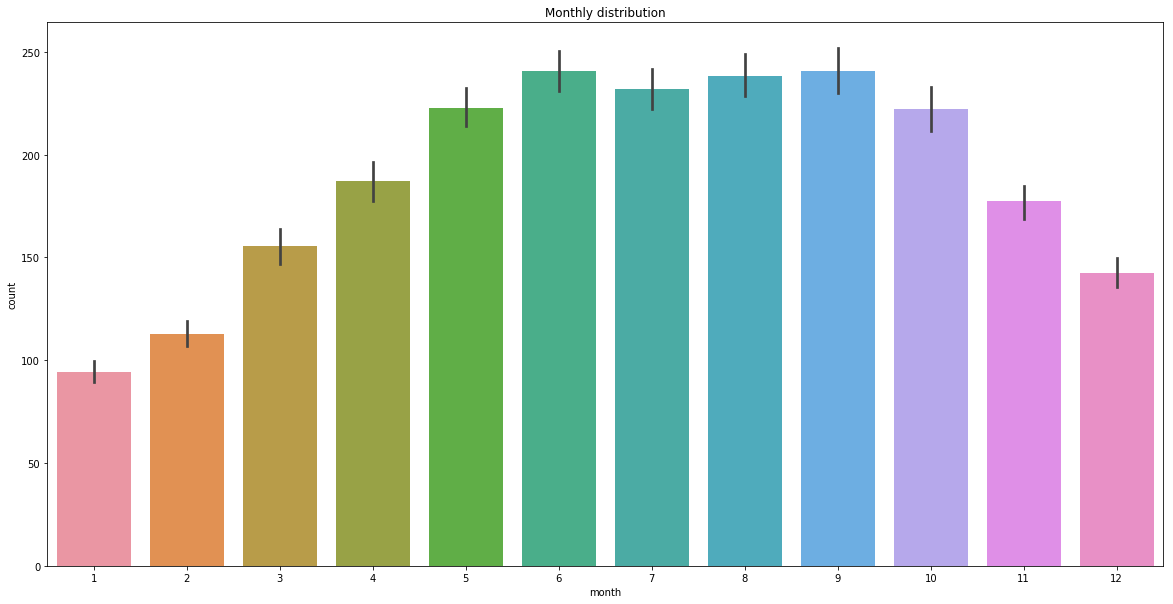

In [10]:
fig, ax = plt.subplots(figsize=(20,10))
sn.barplot(data=data[['month',
                      'count']],
            x='month', y='count')
ax.set(title="Monthly distribution")

[Text(0.5, 1.0, 'Daily distribution')]

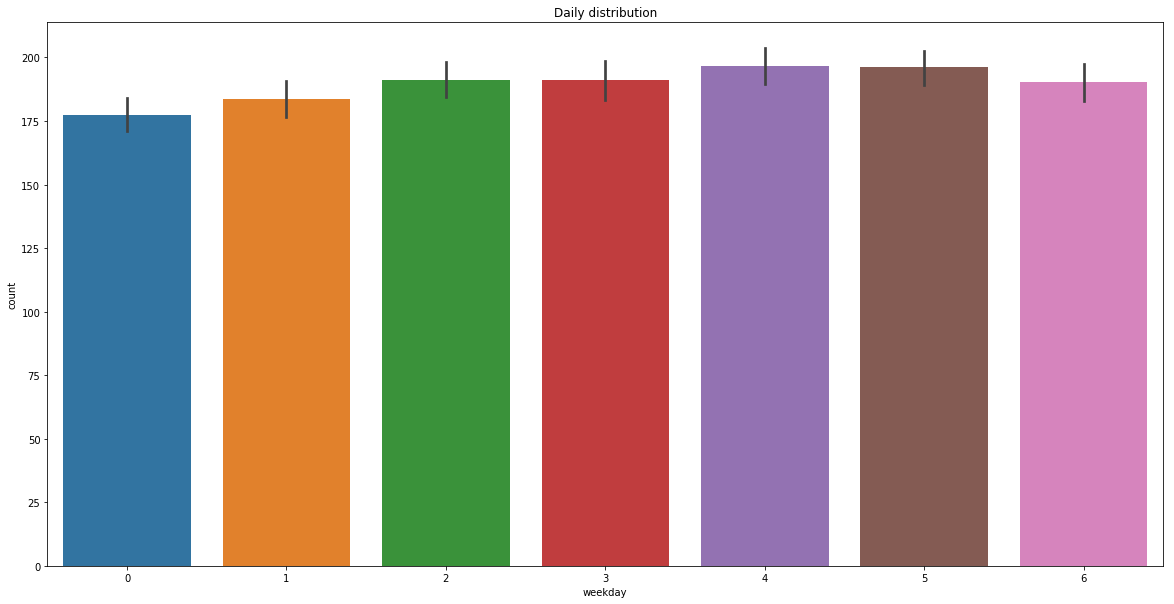

In [11]:
fig, ax = plt.subplots(figsize=(20,10))
sn.barplot(data=data[['weekday',
                      'count']],
            x='weekday', y='count')
ax.set(title="Daily distribution")

## CORRELATION

It’s also a good idea to look for data correlation to see how variables are interconnected. Remember that if we decide to use linear regression as our prediction model, we can’t have multicollinearity and data distribution must be normal. As a recall, regression analysis assumptions are:

*Samples must represent population being modeled.
*Independent variables are linearly independent.
*Variance of error is consistent across the sample.

- After plotting a few graphs, first thing we notice here is that temp and atemp variables are highly correlated. Let’s remove atemp already.

- Another problem are our registered and casual variables. Think about it: imagine that you are trying to predict the total number of users for tomorrow. While you can have data such as the month, the weekday, the temperature and the weather condition, it’s impossible to have the number of registered and casual users because this is exactly what you are trying to predict. Also, since the count is a decomposition of these two variables, we could have problems if they remain on the data set. So, let’s get rid of them too.

- Notice that windspeed correlation with count is so low that we won’t even consider it in our model. We can remove it too.

- PS.: On another model, I also removed weekday from the data set. The impact was very low overall (error was slightly lower), but it helped the model to train faster.

After doing all this, let’s plot the correlation between : count, humidity and temp.

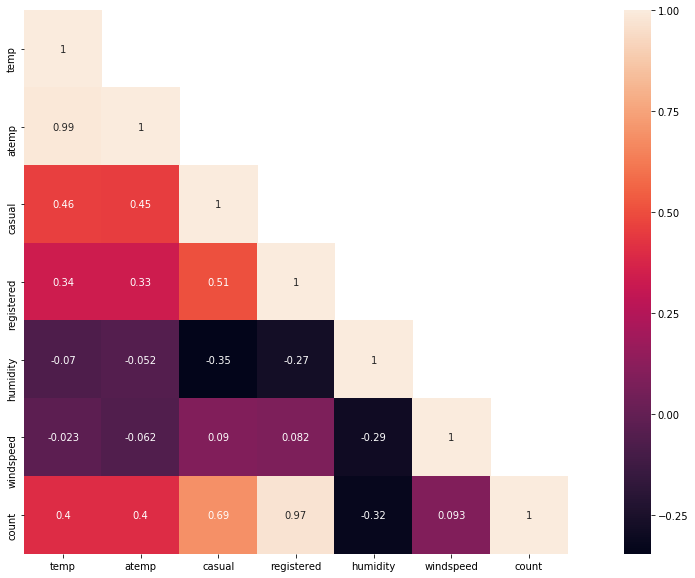

In [12]:
data_correlation = data[['temp', 'atemp', 'casual', 'registered', 'humidity', 'windspeed', 'count']].corr()
mask = np.array(data_correlation)
# Try numpy.triu (triangle-upper) and numpy.tril (triangle-lower)
mask[np.tril_indices_from(mask)] = False
fig = plt.subplots(figsize=(20,10))
sn.heatmap(data_correlation, mask=mask, vmax=1, square=True, annot=True)

In [13]:
data = data.drop(['atemp', 'casual', 'registered', 'windspeed'], axis=1)

[Text(0.5, 1.0, 'Relation between humidity and total users')]

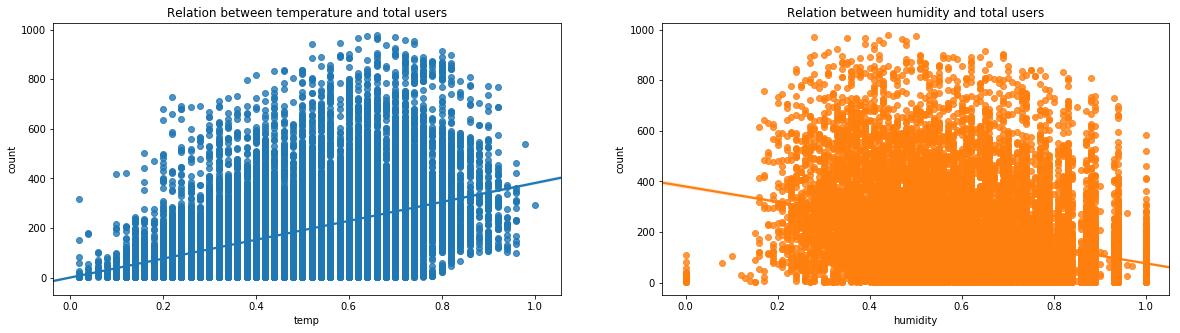

In [14]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,5))
sn.regplot(x=data['temp'], y=data['count'], ax=ax1)
ax1.set(title="Relation between temperature and total users")
sn.regplot(x=data['humidity'], y=data['count'], ax=ax2)
ax2.set(title="Relation between humidity and total users")

## OUTLIERS

We can’t forget to check for outliers. ML algorithms are sensitive to this, which can lead to longer training time and wrong results.

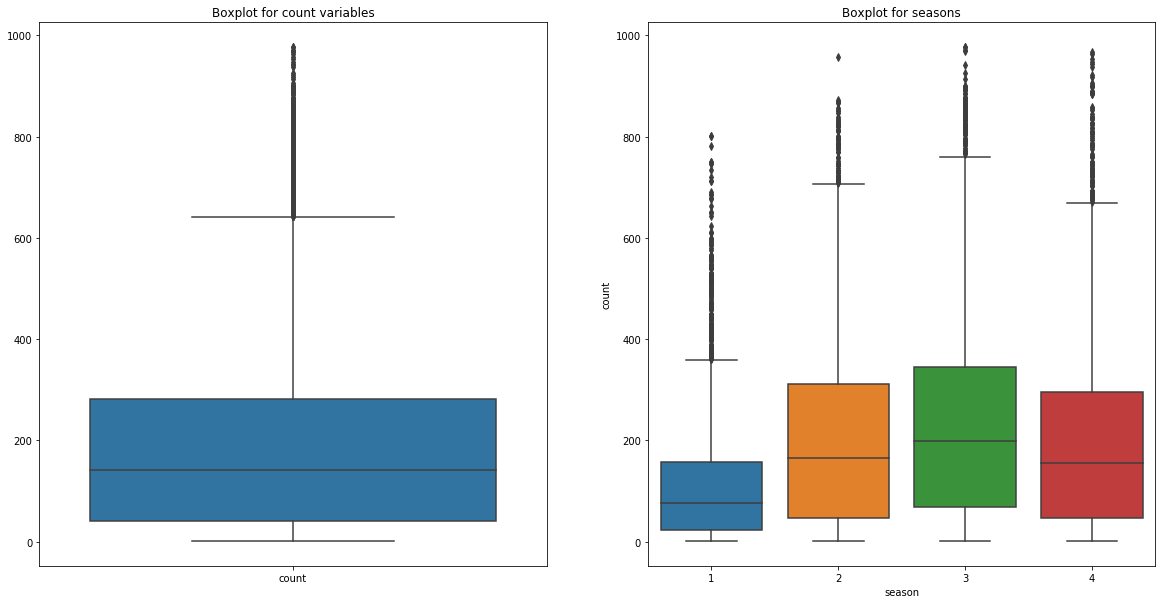

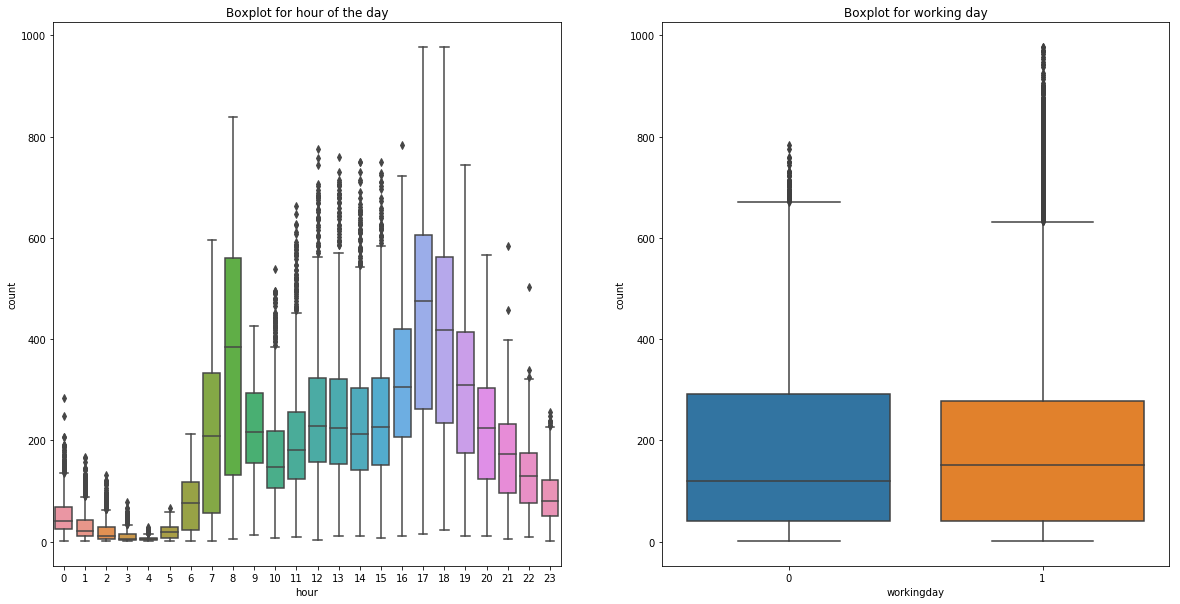

In [15]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,10))
sn.boxplot(data=data[['count']], ax=ax1)
ax1.set(title="Boxplot for count variables")
sn.boxplot(x=data['season'],y=data['count'], ax=ax2)
ax2.set(title="Boxplot for seasons")

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,10))
ax1.set(title="Boxplot for hour of the day")
sn.boxplot(x=data['hour'],y=data['count'], ax=ax1)
ax2.set(title="Boxplot for working day")
sn.boxplot(x=data['workingday'],y=data['count'], ax=ax2)

## LOG DISTRIBUTION:

Do you remember about the importance of a normal distribution? If you plot the count variable, you will see that it’s not normal. Let’s apply a log transformation to it so we can have something closer to a normal distribution.

statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.
Internally, **statsmodels uses the patsy package to convert formulas and data to the MATRICES that are used in model fitting**. The formula framework is quite powerful; A full description of the formula language can be found in the patsy docs: https://patsy.readthedocs.io/en/latest/overview.html

patsy is a Python package for describing statistical models (especially linear models, or models that have a linear component) and building design matrices. It is closely inspired by and compatible with the formula mini-language used in R and S.

For instance, if we have some variable y, and we want to regress it against some other variables x, a, b, and the interaction of a and b, then we simply write:
> patsy.dmatrices("y ~ x + a + b + a:b", data)

and Patsy takes care of building appropriate matrices. 

The Rdatasets project gives access to the datasets available in R’s core datasets package and many other common R packages. All of these datasets are available to statsmodels by using the get_rdataset function. **The actual data is accessible by the data attribute.** For example:

In [1]: import statsmodels.api as sm

In [2]: duncan_prestige = sm.datasets.get_rdataset("Duncan", "carData")

In [3]: print(duncan_prestige.__doc__)

**get_rdataset(dataname[, package, cache])	download and return R dataset
  get_data_home([data_home])	Return the path of the statsmodels data dir.
  clear_data_home([data_home])	Delete all the content of the data home cache.**

### A Gentle Introduction to Normality Tests in Python
https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
    
**Popular plot for checking the distribution of a data sample is the quantile-quantile plot, Q-Q plot, or QQ plot for short.**
This plot generates its own sample of the idealized distribution that we are comparing with, in this case the Gaussian distribution. The idealized samples are divided into groups (e.g. 5), called quantiles. Each data point in the sample is paired with a similar member from the idealized distribution at the same cumulative distribution.

The resulting points are plotted as a scatter plot with the idealized value on the x-axis and the data sample on the y-axis.

A perfect match for the distribution will be shown by a line of dots on a 45-degree angle from the bottom left of the plot to the top right. Often a line is drawn on the plot to help make this expectation clear. Deviations by the dots from the line shows a deviation from the expected distribution.

We can develop a QQ plot in Python using the qqplot() statsmodels function. The function takes the data sample and by default assumes we are comparing it to a Gaussian distribution. We can draw the standardized line by setting the ‘line‘ argument to ‘s‘.

Running the example below creates the QQ plot showing the scatter plot of points in a diagonal line, closely fitting the expected diagonal pattern for a sample from a Gaussian distribution.
There are a few small deviations, especially at the bottom of the plot, which is to be expected given the small data sample.



#Example of plotting the test dataset as a QQ plot is provided below. (NOT RELATED TO THE PROJECT -- LEARNING PURPOSES)

#QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
#seed the random number generator
seed(1)
#generate univariate observations
data = 5 * randn(100) + 50
#q-q plot
qqplot(data, line='s')
pyplot.show()



[Text(0.5, 1.0, 'Theoretical quantiles')]

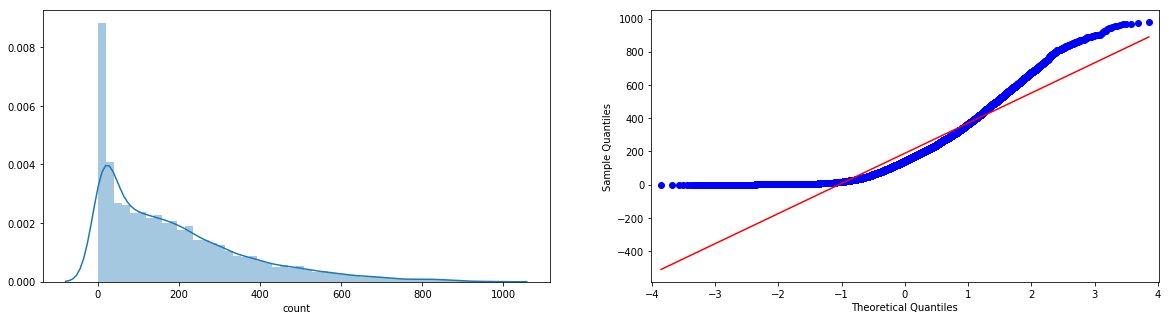

In [16]:
from statsmodels.graphics.gofplots import qqplot

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,5))
sn.distplot(data['count'], ax=ax1)
ax.set(title="Distribution after log of count")
qqplot(data['count'], line='s', ax=ax2)
ax.set(title="Theoretical quantiles")

In [17]:
import math
data['count'] = data['count'].transform(lambda x: math.log(x))

[Text(0.5, 1.0, 'Theoretical quantiles')]

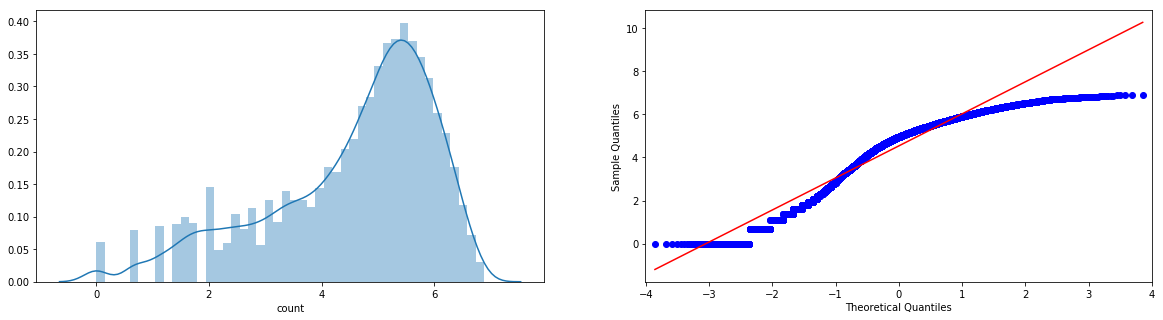

In [18]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,5))
sn.distplot(data['count'], ax=ax1)
ax.set(title="Distribution after log of count")
qqplot(data['count'], line='s', ax=ax2)
ax.set(title="Theoretical quantiles")


## ONE HOT ENCODING:
Since we have categorical values in our data set, we need to ‘tell’ our algorithm that classes have equal weight for our analysis. For instance: our weekdays are represented by numbers from 0 to 6. But we can’t really say that a 6 is better than a 5 here.
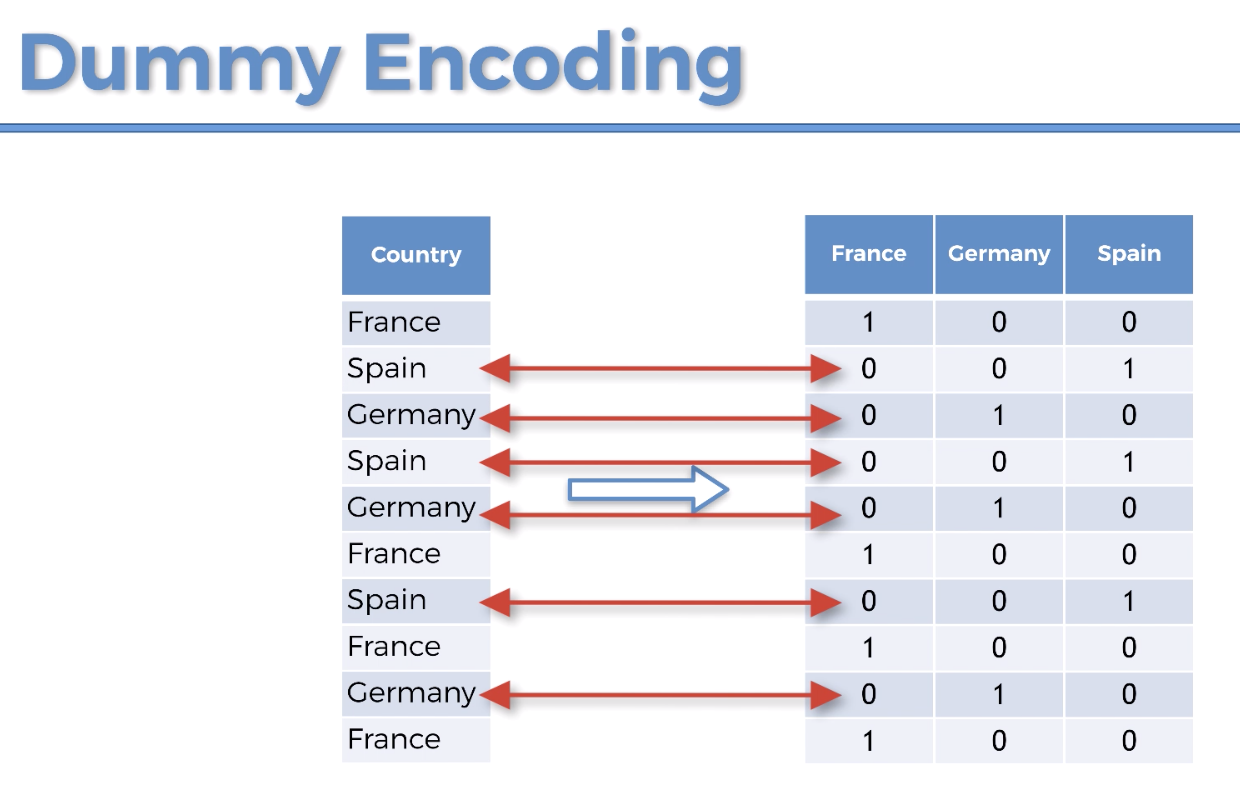

A way to change this perspective is using the one hot encoding technique. This is a process by which we convert categorical variables into binary categories. By the way, when we apply one hot encoding, it’s important to left one variable out to avoid multicollinearity. Here’s why 'drop_first' is set as True .

In the example below,

pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

'Converts categorical variable into dummy/indicator variables'

In [19]:
data_dummy = data

def dummify_dataset(df, column):       
    df = pd.concat([df, pd.get_dummies(df[column], prefix=column)],axis=1)
    df = df.drop([column], axis=1)
    return df

columns_to_dummify = ['season', 'month', 'hour', 'holiday', 'weekday', 'workingday', 'weather']
for column in columns_to_dummify:
    data_dummy = dummify_dataset(data_dummy, column)
       
data_dummy.head(1)
print(data_dummy.columns)

Index(['temp', 'humidity', 'count', 'season_1', 'season_2', 'season_3',
       'season_4', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5',
       'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'holiday_0',
       'holiday_1', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'workingday_0', 'workingday_1',
       'weather_1', 'weather_2', 'weather_3', 'weather_4'],
      dtype='object')


## Choosing the algorithm
When the data is not normally distributed, we can apply a non-linear transformation to try to fix this issue. We can also use a nonparametric algorithm on these cases. By the way, we call nonparametric the algorithms that do not make strong assumptions about the form of the mapping function.

We can quickly test algorithms performance by using the 'model_selection.cross_val_score' function. Let’s see how some algorithms perform by measuring their 'mean squared error'.

But before, we need to split our data into training and test.

In [20]:
from sklearn.model_selection import train_test_split

y = data_dummy['count']
X = data_dummy.drop(['count'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.33,
                                                   random_state=42)

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, ElasticNetCV
from sklearn.ensemble import BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor

models = [LinearRegression(),
          Ridge(),
          HuberRegressor(),
          ElasticNetCV(),
          DecisionTreeRegressor(), 
          ExtraTreesRegressor(),
          GradientBoostingRegressor(),
          RandomForestRegressor(),
          BaggingRegressor()]

#Checking Performance of the Algorithm
def test_algorithms(model):
    kfold = model_selection.KFold(n_splits=10, random_state=0)
    predicted = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(predicted.mean())    #Average value of Performance in neg_mean_square_error (closer to 0 is good model)
    
for model in models:
    test_algorithms(model)

-0.4440142459004089
-0.44395052122487844
-0.46108109931174807
-0.4439137576535221
-0.34988702697350055
-0.22634398966927344
-0.3081705356531289
-0.203198476747858
-0.20441211075713833


As we can see, the **ExtraTreeRegressor algorithm** had a good performance, which is good, because tree methods are generally insensitive to outliers. We’ll do a first performance test. We won’t change any hyperparameter nor the number of variables. Let’s check how the model behaves by checking its Root Mean Squared Logarithm Error . We see that we have an error of 0.15.



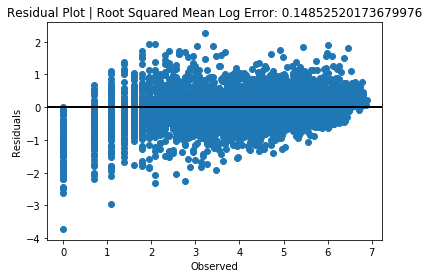

In [22]:
from sklearn.metrics import mean_squared_log_error
 
etr = ExtraTreesRegressor()
etr.fit(X_train, y_train)
y_pred = etr.predict(X_test)
print()

# Plot the residuals
residuals = y_test-y_pred
fig, ax = plt.subplots()
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text('Residual Plot | Root Squared Mean Log Error: ' + str(np.sqrt(mean_squared_log_error(y_test, y_pred))))
plt.show()

In [23]:
len(X_train.columns)

57

## Improving the model
We can always do things better. First of all, we can get rid of features that are not important for the model. This is called dimensionality reduction. Then, we can fine tune our algorithm by testing different configurations for it.

For dimensionality reduction, we can use a linear technique called principal component analysis (PCA). **PCA works by creating a linear mapping of the data to a lower-dimensional space and rebuilding its variance**. While this can lead to information loss, it also helps us to reduce dimensionality.

Observe that we have plotted a graph to explain the variance of the data by the number of variables. **Our goal is to find a “break point” on the graph that will correspond to our optimal number of variables.**

We can also tune our algorithm by testing different parameters. We’ll use GridSearchCV for that.

Text(0, 0.5, 'Explained variance')

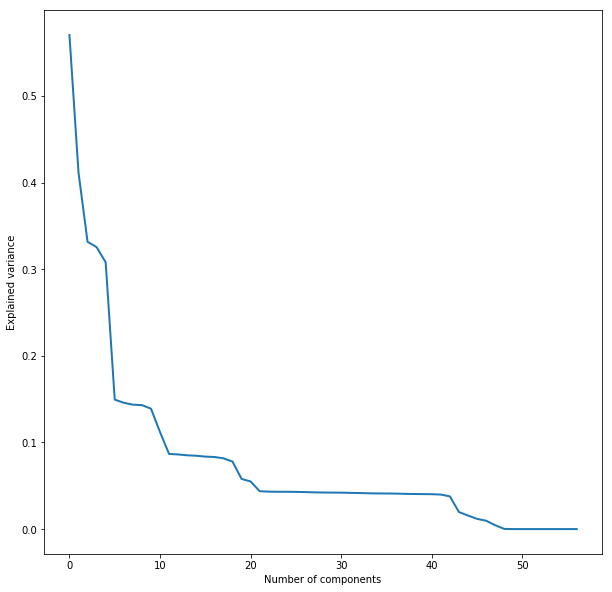

In [24]:
from sklearn import decomposition

# Plot PCA spectrum
pca = decomposition.PCA()
pca.fit(X_train)

plt.figure(1, figsize=(10, 10))
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

In [25]:
pca.explained_variance_

array([5.70488839e-01, 4.11770915e-01, 3.31662626e-01, 3.25481469e-01,
       3.08033028e-01, 1.49481105e-01, 1.45817268e-01, 1.43660491e-01,
       1.43097201e-01, 1.39076696e-01, 1.11973284e-01, 8.67630917e-02,
       8.61654381e-02, 8.51716283e-02, 8.46612660e-02, 8.36715489e-02,
       8.32372813e-02, 8.17108232e-02, 7.79774236e-02, 5.79301705e-02,
       5.49717109e-02, 4.37590164e-02, 4.32363031e-02, 4.30833356e-02,
       4.30662706e-02, 4.29660523e-02, 4.27037740e-02, 4.24392910e-02,
       4.22286764e-02, 4.21169489e-02, 4.20886263e-02, 4.18220780e-02,
       4.16248699e-02, 4.13394883e-02, 4.11611086e-02, 4.10948866e-02,
       4.09881449e-02, 4.06852656e-02, 4.05078621e-02, 4.03950903e-02,
       4.02853389e-02, 3.98700615e-02, 3.77434307e-02, 1.97124199e-02,
       1.56255482e-02, 1.18024780e-02, 9.68641357e-03, 4.43753630e-03,
       2.27721153e-04, 1.12509085e-31, 1.16539461e-32, 4.84548135e-33,
       3.97709555e-33, 3.00297957e-33, 3.00297957e-33, 3.00297957e-33,
      

In [26]:
len(X_train.columns)

57

In [27]:
from sklearn.pipeline import Pipeline

etr = ExtraTreesRegressor()

pipeline = Pipeline(steps=[('pca', pca), 
                           ('etr', etr)])

from sklearn.model_selection import GridSearchCV

print(pipeline.get_params())

{'memory': None, 'steps': [('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('etr', ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False))], 'pca': PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False), 'etr': ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
    

In [28]:
hyperparameters = {'etr__n_estimators' : [10,100,500],
                   'etr__max_depth' : [None, 20, 50],
                   'pca__n_components' : [9,19,39]}

clf = GridSearchCV(pipeline,
                   hyperparameters,
                   cv=10)

clf.fit(X_train, y_train)

# Best params
print(clf.best_params_)

{'etr__max_depth': 20, 'etr__n_estimators': 500, 'pca__n_components': 39}


Now that we have chosen the best parameters, we can check the error again. Now, we had an error of 0.14.



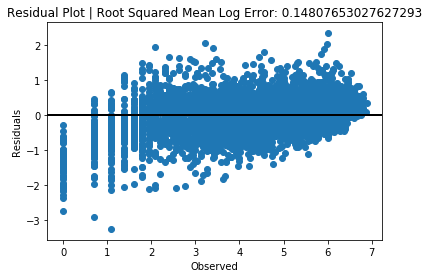

In [29]:
y_pred = clf.predict(X_test)

# Plot the residuals
residuals = y_test-y_pred
fig, ax = plt.subplots()
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text('Residual Plot | Root Squared Mean Log Error: ' + str(np.sqrt(mean_squared_log_error(y_test, y_pred))))
plt.show()

## Final considerations
Understanding demand for bike services is important for logistics matters and for environmental reasons. Today, more and more cities try to implement sharing bike systems and have to deal with increasing demand for this service.

Here, we tried to solve part of this problem: by showing ho many users will use the service, we can better schedule demand and define the best dates for maintenance of bikes that are not in use.

What we found today is that some hours are more busy than others. Some seasons demand more or less bikes on the streets and some other variables seem to have none or little effect over the problem.

Is it possible to get better results? Try a different approach, use variable engineering to derive relevant information. Add variables from other data sets. Remove variables that you are not using. The possibilities are infinite. And you, how would you solve this problem?